In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.applications.xception import preprocess_input
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Flatten,Dropout

Using TensorFlow backend.


In [2]:
img_size_in =(299,299,3)
x_tensor = Input(img_size_in)
xception_model = applications.Xception(weights=None, input_shape=(299, 299, 3),include_top=False,pooling='avg')

In [3]:

x = Dropout(0.85)(xception_model(x_tensor))

x = Dense(512, activation='relu')(x)
x = Dropout(0.85)(x)
outlayer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=x_tensor, outputs=outlayer)

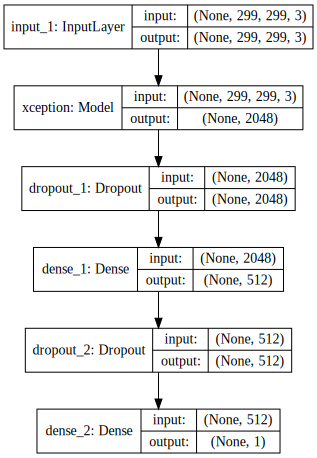

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

plot_model(model, show_shapes=True, to_file='model.png')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))